#### 金融科技学
liyan_zjgsu@163.com

#### 决策树实现

在sklearn库中，可以使用`sklearn.tree.DecisionTreeClassifier`创建一个决策树用于分类，其主要参数有：
- criterion ：用于选择最优特征，可以传入“gini”代表基尼系数或者“entropy”代表信息增益，默认为'gini'
- max_features ：表示在决策树结点进行分裂时，从多少个特征中选择最优特征。可以设定固定数目、百分比或其他标准。它的默认值是使用所有特征个数。

[sklearn.tree: DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

scikit-learn决策树支持二分类和多分类问题，实现流程：
1. 模型初始化：clf = tree.DecisionTreeClassifier()
2. 模型学习：clf.fit(x_train, y_train)
4. 模型预测：y_predict = clf.predict(x_test)

模型评估`sklearn.metrics`：[分类问题评估](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)
- 混淆矩阵计算：metrics.confusion_matrix(y_test, y_predict)
- 分类性能报告：metrics.classification_report(y_test, y_predict)
- accuracy_score, precision_score, recall_score...

|参数说明||
|--|--|
|x_train[n, m]|多维数组，用 [n_samples, m_features] 的方式来存放训练样本|
|y_train[n]|整数值数组，用 [n_samples] 来保存训练样本的类标签|

##### 决策树的一个简单示例：

In [1]:
from sklearn import tree
X = [[0, 0, 1], [1, 1, 2]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

执行通过之后，可以使用该模型来预测样本类别:

In [2]:
clf.predict([[0, 0, 0]])

array([0])

另外，也可以预测样本属于每个类的概率:

In [3]:
clf.predict_proba([[0, 0, 0]])

array([[1., 0.]])

`DecisionTreeClassifier` 既能用于二分类（其中标签为[-1,1]）也能用于多分类（其中标签为[0,…,k-1]）。

##### 使用Iris鸢尾花数据集构造决策树

导入数据：

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
## 数据导入
iris = load_iris()
type(iris)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

查看数据：

In [18]:
## 将bunch转为dataframe输出
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


可视化数据特征：

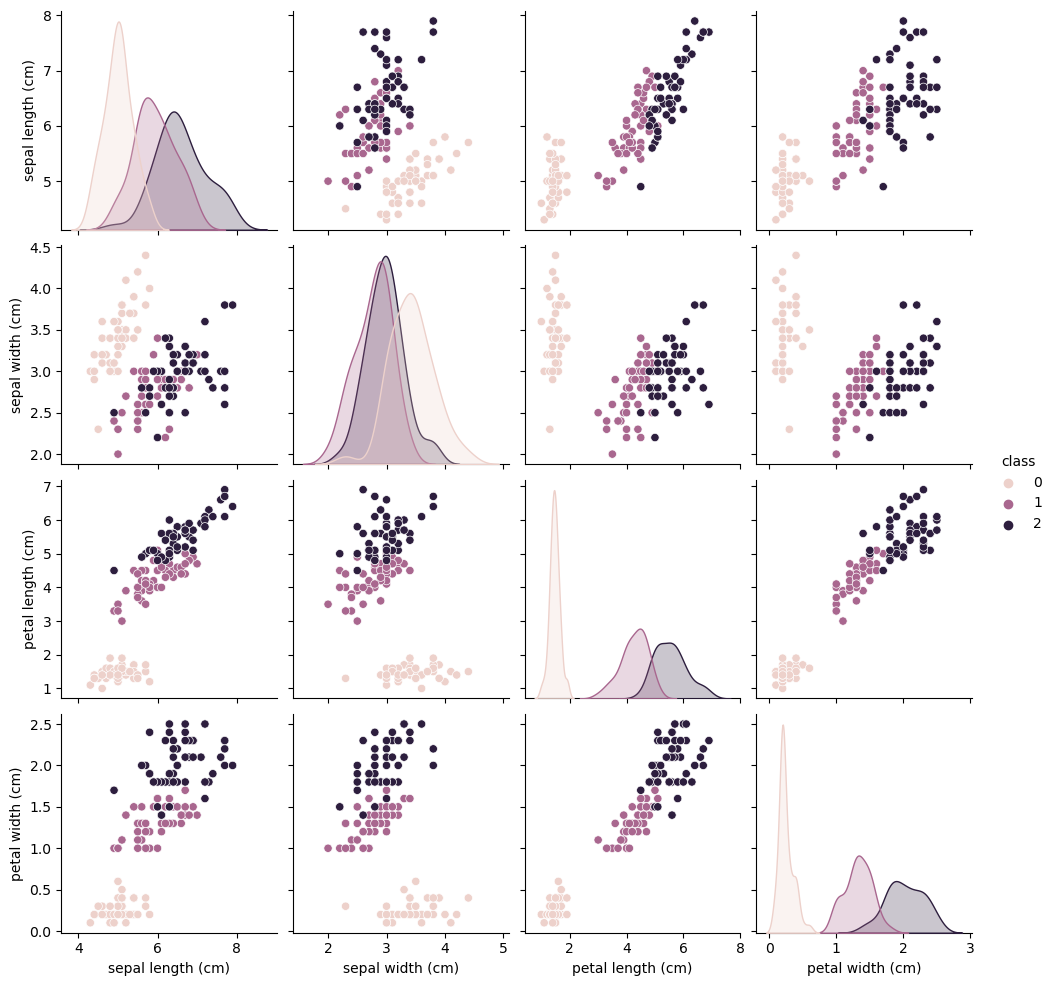

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_df, kind = 'scatter', hue = 'class')
plt.show()

**构造决策树**：交叉验证法

[Evaluate metric(s) by cross-validation and also record fit/score times.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_validate)：  
`model_selection.cross_validate(estimator, X)`

In [26]:
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris

iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0)
cross_validate(clf, iris.data, iris.target, cv=10)

{'fit_time': array([0.00052118, 0.00099921, 0.00098372, 0.0010016 , 0.00098801,
        0.00099874, 0.00153065, 0.00097632, 0.0010004 , 0.00097728]),
 'score_time': array([0.00098753, 0.0010016 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00099921, 0.        , 0.        ]),
 'test_score': array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
        0.86666667, 0.93333333, 1.        , 1.        , 1.        ])}

**构造决策树**：留出法

[Split arrays or matrices into random train and test subsets.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)：  
`model_selection.train_test_split(*arrays[, ...])`

In [42]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
# clf.score(x_test, y_test)
acc_s = accuracy_score(y_test, y_predict)
print('准确率：', acc_s)
print('分类性能报告：\n', classification_report(y_test, y_predict))

准确率： 0.9777777777777777
分类性能报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



使用[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)绘制树结构：

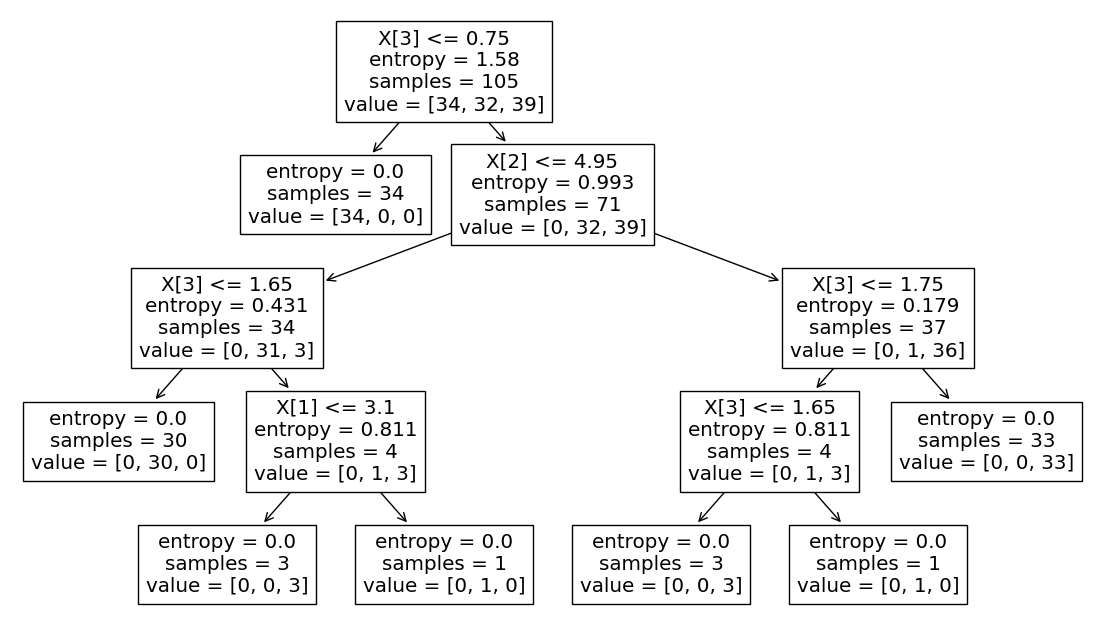

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(14,8))
tree.plot_tree(clf)
plt.show()

文本格式导出树结构：

In [47]:
print(tree.export_text(clf, feature_names=iris.feature_names))

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



#### 集成学习

集成方法的目标是把多个使用给定学习算法构建的基学习器的预测结果结合起来，从而获得比单个学习器更好的泛化能力。  
集成方法通常分为两种:
- 平均方法，该方法的原理是构建多个独立的学习器，然后取它们的预测结果的平均。一般来说组合之后的学习器是会比单个学习器要好的，因为它的方差减小了。  
    示例: Bagging 方法 , 随机森林 , …
- 相比之下，在 boosting 方法中，基学习器是依次构建的，并且每一个基学习器都尝试去减少组合学习器的偏差。这种方法的主要目的是为了结合多个弱模型，使集成的模型更加强大。  
    示例: AdaBoost , 梯度提升树 , …
    
在 scikit-learn 中，bagging 方法使用统一的 `BaggingClassifier` 元估计器（或者 `BaggingRegressor` ），输入的参数和随机子集抽取策略由用户指定：
- max_samples 和 max_features 控制着子集的大小（对于样例和特征）。
- bootstrap 和 bootstrap_features 控制着样例和特征的抽取是有放回还是无放回的。

[sklearn.ensemble: EnsembleMethods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

#### 随机森林实现

`sklearn.ensemble` 模块包含两个基于随机决策树的平均算法： RandomForest 算法和 Extra-Trees 算法。通过在分类器构造过程中引入随机性来创建一组不同的分类器。集成分类器的预测结果就是单个分类器预测结果的平均值。

在随机森林中（参见 RandomForestClassifier 和 RandomForestRegressor 类），集成模型中的每棵树构建时的样本都是由训练集经过**自助抽样**得来的。另外，在构建树的过程中进行结点分割时，选择的分割点不再是所有特征中最佳分割点，而是特征的一个**随机子集**中的最佳分割点。由于这种随机性，森林的偏差通常会有略微的增大，但是由于取了平均，其方差也会减小，通常能够补偿偏差的增加，从而产生一个总体上更好的模型。

与原始文献不同的是，scikit-learn 的实现是取每个分类器预测概率的平均，而不是让每个分类器对类别进行投票。

使用集成方法时要调整的**参数**主要是 n_estimators 和 max_features。  
- n_estimators 是森林里树的数量，通常数量越大，效果越好，但是计算时间也会随之增加。此外要注意，当树的数量超过一个临界值之后，算法的效果并不会很显著地变好。  
- max_features 是分割节点时考虑的特征的随机子集的大小。这个值越低，方差减小得越多，但是偏差的增大也越多。 

设 n_features 为所有特征的个数，根据经验，**回归问题中使用 max_features = n_features ，分类问题中使用 max_features = sqrt(n_features) 是比较好的默认值**。max_depth = None 和 min_samples_split = 2 结合通常会有不错的效果（即生成完全的树）。当然，这些（默认）值有可能不是最佳的，同时还可能消耗大量的内存。

当使用自助采样法方法抽样时，泛化精度可以通过袋外的样本来估算，设置 oob_score = True 即可实现。

[sklearn.ensemble: RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#)

使用sklearn生成样本：[Samples generator](https://scikit-learn.org/stable/modules/classes.html#samples-generator)

##### 随机森林的一个简单示例：

In [101]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0, 1], [1, 1, 2]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10, oob_score=True)
clf = clf.fit(X, Y)
clf.predict([[0, 0, 0]])

array([0])

##### 比较decision tree和random forest的性能：

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# # 使用make_classification生成分类样本数据
# n = 100
# X, y = make_classification(n_samples=10000, n_features=20, random_state=n)

# 使用sklearn自带的癌症数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=n)
scores = cross_val_score(clf, X, y, cv=5)
print('score of Decision Tree: %.3f'%scores.mean())

clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=n)
scores = cross_val_score(clf, X, y, cv=5)
print('score of RandomForest %.3f'%scores.mean())

score of Decision Tree: 0.914
score of RandomForest 0.960


Exercise1：

    1. 尝试使用决策树分类器解决贝叶斯部分的课程作业，并将结果进行比较。
    2. 尝试对上述结果进行优化。

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# # 使用make_classification生成分类样本数据
# n = 100
# X, y = make_classification(n_samples=10000, n_features=20, random_state=n)

# 使用sklearn自带的癌症数据集
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=n)
scores = cross_val_score(clf, X, y, cv=5)
print('score of Decision Tree: %.3f'%scores.mean())

clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=n)
scores = cross_val_score(clf, X, y, cv=5)
print('score of RandomForest %.3f'%scores.mean())